# Matemática para Ciencia de los Datos
# Trabajo Práctico 3

Profesor: Juan Luis Crespo Mariño (basado en trabajo previo de Luis Alexánder Calvo Valverde)

Instituto Tecnológico de Costa Rica,

Programa Ciencia de Datos

---

Fecha de entrega: 12 de agosto de 2025, hora límite 6:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ).

Estudiante(s):
1. **Nombre_Estudiante_1**
1. **Nombre_Estudiante_2**


---

**Pregunta 1**



Se puede demostrar que para los vectores generadores de un subespacio $E=\textrm{espacioGenerado}\left\{ \vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right\}$ , con $V=\left[\vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{m}\right]$,con $\vec{v}_{m}\in\mathbb{R}^{n}$ si son ortonormales, la ecuación de la proyección de un vector $\vec{u}\in\mathbb{R}^{n}$ originalmente dada por:

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$$

se puede reescribir como:

$$\textrm{proy}\left(\vec{u};V\right)=\textrm{argmin}_{\vec{v}\in E}\left\Vert \vec{v}-\vec{u}\right\Vert _{2}=V\,V^{T}\vec{u}$$

con $V\in\mathbb{R}^{n\times m}$.



Para validar esto: 

Para toda matriz ortonormal 

## $U\in\mathbb{R}^{n\times n}$ 

Se cumple que: 

## $U^{T}U=I=U\,U^{T}$






**1.1 (25 puntos)**

Utilizando numpy, proponga una matriz ortonormal de dimensiones 3x3, para ello utilice una fuente como "Proceso de ortonormalización de  Gram - Schmidt" (https://blog.nekomath.com/algebra-lineal-i-proceso-de-gram-schmidt/) para producir una matriz ortonormal a partir de una matriz que no es ni ortonormal ni ortogonal.

Finalmente muestre en numpy que su matriz resultante es ortonormal ($V$).



In [127]:
import numpy as np

def gram_schmidt_orthonormal(mat):
    """
    Aplica el proceso de Gram-Schmidt para obtener una base ortonormal
    a partir de una matriz cuyas columnas son vectores.
    """
    tmp_a = np.copy(mat).astype(np.float64) # Se crea una instacia local 
    n = tmp_a.shape[1]
    for j in range(n):
        # Para cada vector en las Columna j se debe encontrar la proyección perpendicular
        # de los vectores ortogonales previos.
        for k in range(j):
            tmp_a[:, j] -= np.dot(tmp_a[:, k], tmp_a[:, j]) * tmp_a[:, k]
        # 
        # Normalizar la matriz
        # el siguiente IF, lo que realiza es que verifica que la norma del vector sea mayor que 0 
        # para asegurarse que no tener error en la normalización. 
        if np.isclose(np.linalg.norm(tmp_a[:, j]), 0, rtol=1e-15, atol=1e-14, equal_nan=False):
            tmp_a[:, j] = np.zeros(tmp_a.shape[0])
        else:    
            tmp_a[:, j] = tmp_a[:, j] / np.linalg.norm(tmp_a[:, j])
    return tmp_a

# Ejemplo de uso
# np.array([[5., 16., 87.], [10., 6., 18.], [4., 4., 83.]])

a = np.array([
    [16.0, 25.0, 99.0],
    [22.0, 44.0, 24.0],
    [0.0, 2.0, 18.0]
])
q = gram_schmidt_orthonormal(a)
print("Matriz Original:")
print(a)
print("-"*40)

print("Matriz ortonormal:")
print(q)
print("-"*40)
q_t = np.transpose(q)  # se puede usar  q.T  el cual devuelve de una vez la tarnspuesta 

q1_result = q.T@q   # se puede utilizar el @ en vez de matmul ya que esta 
                    # sobrecarga del operador esta en la misma biblioteca. 
print(q1_result)

print("-"*40)
print("Matriz redondeando a 10 digitos:")
print(np.round(q1_result,10))


Matriz Original:
[[16. 25. 99.]
 [22. 44. 24.]
 [ 0.  2. 18.]]
----------------------------------------
Matriz ortonormal:
[[ 0.5881717  -0.762548    0.26939673]
 [ 0.80873608  0.55458037 -0.1959249 ]
 [ 0.          0.33310834  0.94288856]]
----------------------------------------
[[ 1.00000000e+00  9.69092470e-16  1.96236954e-15]
 [ 9.69092470e-16  1.00000000e+00 -1.68801183e-16]
 [ 1.96236954e-15 -1.68801183e-16  1.00000000e+00]]
----------------------------------------
Matriz redondeando a 10 digitos:
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]


**1.2 (15 puntos)**

Proponga un vector $\vec{u}$ y programe en numpy las operaciones algebraicas siguientes (tome $V$ del paso anterior).

$V\,\left(V^{T}V\right)^{-1}V^{T}\vec{u}$

y,

$V\,V^{T}\vec{u}$


In [128]:
import numpy as np
from numpy import linalg as LA

def projectInvertible(y, A):
  """
  y: column vector, 2d array
  A: n x m matrix, 2d array
  """
  At = np.transpose(A)
  invMatrix = LA.inv(np.matmul(At,A))
  return np.matmul( np.matmul(np.matmul(A,invMatrix), At), y)

def projectInvertibleOrt(y, A):
  """
  y: column vector, 2d array
  A: n x m matrix, 2d array
  """
  At = np.transpose(A)
  return np.matmul(A, np.matmul(At, y))

u = np.array([45., 32.5, -17.45])
proy1 = projectInvertible(u, q)
proy2 = projectInvertibleOrt(u, q)

print(f"V(VtV)^-1Vtu = {proy1}")
print(f"VVtu = {proy2}")


print("Se puede observar que V(VtV)^-1Vtu es igual a VVtu")

V(VtV)^-1Vtu = [ 45.    32.5  -17.45]
VVtu = [ 45.    32.5  -17.45]
Se puede observar que V(VtV)^-1Vtu es igual a VVtu


**1.3 (10 puntos)**

Programe en python para calcular el error de proyección obtenido para los casos del punto **1.2**.

In [129]:
def calculateProjectionError(v, y):
  """
  Calculate projection error by using the euclidian distance
  """
  return LA.norm(v - y, 2)

print("Error de proyección: ")
error = calculateProjectionError(proy1, u)
print(error)

Error de proyección: 
0.0


---

**Pregunta 2 (10 puntos)**


Programe en python la función calculeDet2, que recibe como parámetro una matriz cuadrada de dimensiones 2x2, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función tipo det para calcularla. Pruébela con dos matrices que Usted proponga.

def calculeDet2( M ):





In [130]:
import numpy as np

def calculeDet2(M: np.ndarray) -> float:
  """
  Calcula determinante para matrices 2x2
  """
  if M.shape[0] != 2 or M.shape[1] != 2:
    raise Exception("Metodo exclusivo para calcular la determinante de una matriz 2x2")
  
  return M[0,0]*M[1,1] - M[0,1]*M[1,0]

m1 = np.array([[1,3],[3,2]], dtype=np.float32)
print(f"Verificando la misma matriz de la clase 4\n{m1}")
print(calculeDet2(m1))
print("\nMatriz aleatoria y comparando valores con funcion hecha y funcion det")
m2 = np.array([[45,-39.5],[1001,2002]], dtype=np.float32)
print(calculeDet2(m2))
print(np.linalg.det(m2))

Verificando la misma matriz de la clase 4
[[1. 3.]
 [3. 2.]]
-7.0

Matriz aleatoria y comparando valores con funcion hecha y funcion det
129629.5
129629.5


---

**Pregunta 3 (10 puntos)**


Programe en python la función calculeDet3, que recibe como parámetro una matriz cuadrada de dimensiones 3x3, llamada M, y retorna el determinante de esa matriz. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función de numpy tipo det para calcularla (sí puede usar función que programó en la **Pregunta 2**). Pruébela con dos matrices que Usted proponga.

def calculeDet3( M ):






In [131]:
import numpy as np


def calculeDet3(M: np.ndarray) -> float:
  """
  Calcula determinante para matrices 3x3
  """
  if M.shape[0] != 3 or M.shape[1] != 3:
    raise Exception("Metodo exclusivo para calcular la determinante de una matriz 3x3")
  
  return (M[0,0] * calculeDet2(M[1:3, 1:3])) - (M[0,1] * calculeDet2(M[1:3, [0, 2]])) + (M[0,2] * calculeDet2(M[1:3, 0:2]))

m3 = np.array([[3,0,4],[2,5,6],[1,4,8]], dtype=np.float32)
print(f"Verificando la misma matriz de la clase 4\n{m3}")
print(calculeDet3(m3))

print("\nMatriz aleatoria y comparando valores con funcion hecha y funcion det")
m4 = np.array([[10,6,18],[4,4,83], [16,5,87]], dtype=np.float32)
print(calculeDet3(m4))
print(np.linalg.det(m4))

Verificando la misma matriz de la clase 4
[[3. 0. 4.]
 [2. 5. 6.]
 [1. 4. 8.]]
60.0

Matriz aleatoria y comparando valores con funcion hecha y funcion det
4418.0
4418.0


---

**Pregunta 4 (15 puntos)**

Se tiene que:

$$\textrm{det}\left(A\,B\right)=\textrm{det}\left(A\right)\,\textrm{det}\left(B\right)$$

Proponga dos matrices de 4x4 ( $A$ e $B$) y programando en numpy muestre esta igualdad (puede usar de numpy las funciones det y la de multiplicar matrices).






In [132]:
import numpy as np

A = np.array([
    [7.7, 8.8, 13.4, 43.56], 
    [56.4, 33.2, 999.99, 10.0], 
    [87.6, 44.9, 33.998, 12.12], 
    [55.3, 91.456, 99.01, 10001.0]])
B = np.array([
    [1.25, 3.14, 2.71, 4.56],
    [0.89, 5.67, 1.23, 7.89],
    [4.44, 2.22, 3.33, 1.11],
    [9.99, 8.88, 7.77, 6.66]
])

detAB = np.linalg.det(np.matmul(A, B))
detA = np.linalg.det(A)
detB = np.linalg.det(B)

print(f"det(AB)={detAB}")
print(f"det(A)*det(B)={detA*detB}")

print("Se puede observar que det(AB) es igual a det(A)*det(B)")

det(AB)=201341521268.31088
det(A)*det(B)=201341521268.3085
Se puede observar que det(AB) es igual a det(A)*det(B)


---

**Pregunta 5 (15 puntos)**


Utilizando el archivo "Dataset_usar.csv", haga:
- Cargue el archivo.
- Muestre cuántas filas por cuántas columnas tiene el conjunto de datos.
- Utilizando el modelo $Ax=b$
    - Conforme la matriz $A$ con todas las columnas menos la última de la derecha.
    - Conforme el vector $b$ con la última columna de la derecha.
    - Calcule el vector de pesos ($x$), utilizando el concepto de mínimos cuadrados $\left(A^{T}A\right)^{-1}A^{T}\vec{b}$
    - Calcule un b_estimado con $A$ e $x$
    - Calcule la norma 2 de la diferencia entre b y b_estimado.
    - Grafique b y b_estimado.



 tamaño de datos  (998, 9)
 Donde de las columnas del 1 a 8 es A 
 Las columna 9 es b 
 


Vector de pesos  [-0.14259619 -0.14386635  0.1252491   0.03648526  0.62511504  0.12102967
  0.26373291  0.47919238]


 error estimado   7.133651035910991




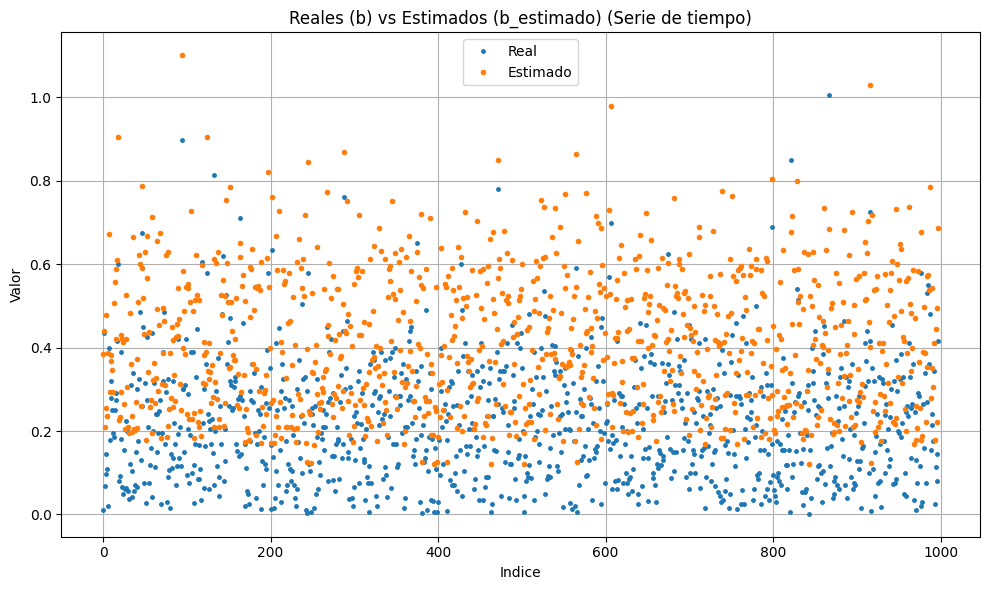

In [138]:
import pandas as pd
from numpy.linalg import pinv, matmul, norm
import numpy as np

import matplotlib.pyplot as plt

archivo = "Dataset_usar.csv"
dataFrame = pd.read_csv(archivo, header = 0, delimiter=';')

matrizDataset = pd.DataFrame(dataFrame).to_numpy()

print(" tamaño de datos ", matrizDataset.shape)
print(" Donde de las columnas del 1 a 8 es A ")
print(" Las columna 9 es b ")
print(" ")

# Dada la matriz A con las primeras 8 columnas
A = matrizDataset[:, :8]

# Dado el vector b con la ultima columna de la derecha
b = matrizDataset[:, 8]

# inicio de calculo del vector de pesos
# (A^T A)⁻1  
inverso_mul_A = np.linalg.inv(A.T @ A)

# (A^T A)⁻1  A^T b
pesos_x = (inverso_mul_A@A.T ) @ b
# calculo de b estimado 
b_estimado = np.matmul(A , pesos_x)
print("")
print("")
print("Vector de pesos ", pesos_x)
print("")
print("")
print(" error estimado  ",  calculateProjectionError(b_estimado, b))
print("")
print("")
# Graficar
indice = np.arange(len(b))
plt.figure(figsize=(10, 6))
plt.plot(indice, b, '.', label='Real', markersize=5)
plt.plot(indice, b_estimado, '.', label='Estimado', markersize=6)
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.title('Reales (b) vs Estimados (b_estimado) (Serie de tiempo)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()